In [46]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [36]:

# 读取数据并删除第一列数字索引
df = pd.read_csv("result.csv")
df = df.drop('Unnamed: 0',axis = 1 )

In [37]:
# 暴力修改列名，因为此处四个列名都需要修改，所以直接暴力修改
df.columns = ['Country','Date','Number of units','Special reserve']
df.head()

,Country,Date,Number of units,Special reserve
0,Germany,Phase 2 (2008-2012),62513891,0
1,Estonia,Phase 2 (2008-2012),58429,0
2,Czech Republic,Phase 2 (2008-2012),798821,0
3,Luxembourg,Phase 2 (2008-2012),2311181,0
4,Denmark,Phase 2 (2008-2012),1074189,39269


In [38]:
def extract_year_range(text):
    pattern = r'\((.*?)\)'  # 匹配括号中的内容
    match = re.search(pattern, text)
    if match:
        return match.group(1)
    else:
        return None

In [39]:
df['Date'] = df['Date'].apply(extract_year_range)
df.head()

,Country,Date,Number of units,Special reserve
0,Germany,2008-2012,62513891,0
1,Estonia,2008-2012,58429,0
2,Czech Republic,2008-2012,798821,0
3,Luxembourg,2008-2012,2311181,0
4,Denmark,2008-2012,1074189,39269


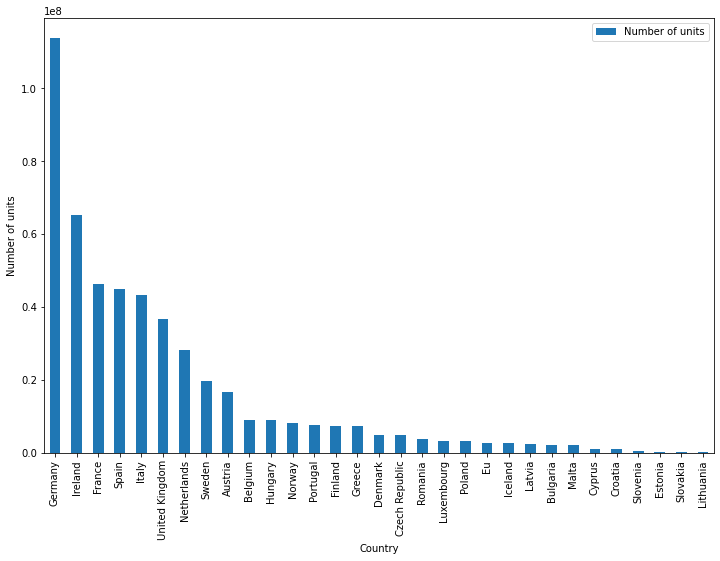

In [44]:
# 按国家划分
df_sum = df.groupby('Country')['Number of units'].sum().reset_index().sort_values('Number of units', ascending=False)

ax = df_sum.plot(kind='bar', x='Country', y='Number of units', figsize=(12, 8))
ax.set_xlabel('Country')
ax.set_ylabel('Number of units')
plt.show()

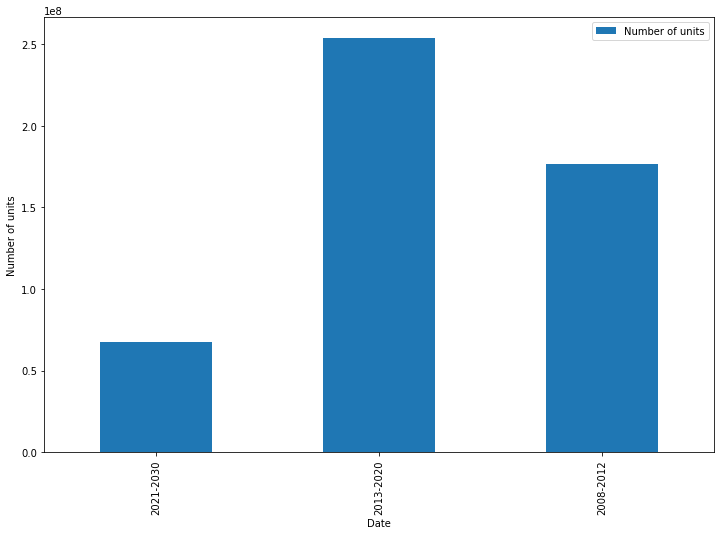

In [45]:
#按时间区间划分
df_sum = df.groupby('Date')['Number of units'].sum().reset_index().sort_values('Date', ascending=False)

ax = df_sum.plot(kind='bar', x='Date', y='Number of units', figsize=(12, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of units')
plt.show()

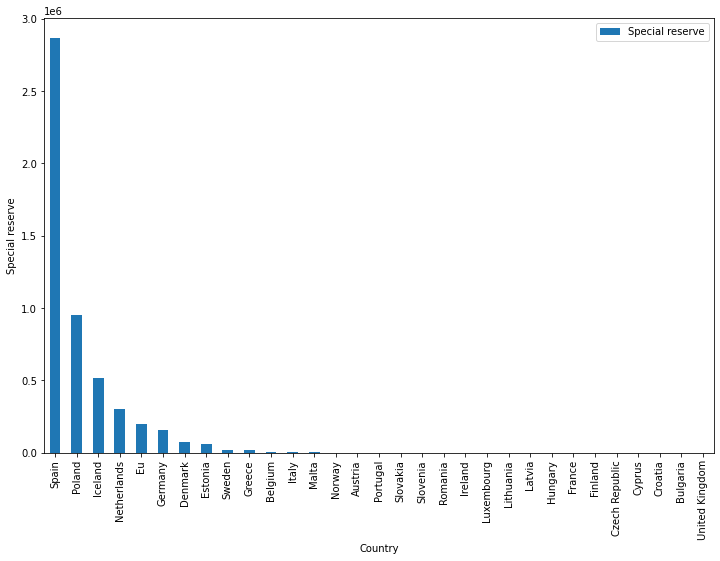

In [47]:
# 按国家划分 special reserve
df_sum = df.groupby('Country')['Special reserve'].sum().reset_index().sort_values('Special reserve', ascending=False)

ax = df_sum.plot(kind='bar', x='Country', y='Special reserve', figsize=(12, 8))
ax.set_xlabel('Country')
ax.set_ylabel('Special reserve')
plt.show()